In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import random
import matplotlib.colors
import copy
%matplotlib inline

In [35]:
def bfs(grid, row, col, row1, col1):

    dRow = [ -1, 0, 1, 0]
    dCol = [ 0, 1, 0, -1]
    visited = [[False for i in range (len(grid))] for i in range (len(grid))]
    parent = [[None for i in range (128)] for i in range (128)]  
    queue = []
    
    def isValid(vis, row, col):

        if (row < 0 or col < 0 or row >= 127 or col >= 127):
            return False
        if (vis[row][col]):
            return False
        return True
    queue.append([row, col])
    visited[row][col] = True
    dist = 0
    explored = []
    explored.append([row, col])

    idx = 0
    while idx < len(queue):
        current = queue[idx]
        idx += 1
        x = current[0]
        y = current[1]
        if x==row1 and y== col1:
            explored.pop()
            path = []
            current = [row1, col1]
            while current != [row, col]:
                currentx , currenty = current[0], current[1]
                next = parent[currentx][currenty]
                path.append(next)
                current = next
            return dist, explored, path

        # Go to the adjacent cells
        for i in range(4):
            adjx = x + dRow[i]
            adjy = y + dCol[i]
            
            if (isValid(visited, adjx, adjy)) and (grid[adjx][adjy]==0):
                    dist+=1
                    explored.append([adjx, adjy])
                    parent[adjx][adjy]=[x,y]
                    queue.append([adjx, adjy])
                    visited[adjx][adjy] = True
                    


In [22]:
def save_animation_video(grid, x,y,endx,endy):
    cp =copy.deepcopy(grid)
    dist, result, path = bfs(grid, x, y, endx, endy)
    xx,yy = path[-2]
    cp[xx][yy] = 3
    result = np.array(result)  
    fig = plt.figure( figsize=(10,10) )
    cmap = matplotlib.colors.ListedColormap(["white", "black",'lightgreen','red'])
    fps = 50

    grid1=[]
    for i in range (len(result)):
        x, y = result[i]
        cp[x][y] = 2
#         print(i[0])
        m = copy.deepcopy(cp)
        grid1.append(m)
    for i in range (len(path)):
        x, y = path[i]
        cp[x][y] = 3
        m = copy.deepcopy(cp)
        grid1.append(m)
        
    im = plt.imshow(grid1[0], cmap=cmap)

    def animate_func (i):
        if i % fps ==0:
            print('.', end=' ')
        im.set_array(grid1[i])
        return [im]

    anim = animation.FuncAnimation(fig, animate_func, frames=len(result)+len(path), interval=10)
    anim.save('bfs2.mp4')
    print("End")

In [36]:
import numpy as np
grid20= np.loadtxt("grid20.txt", dtype= int)
grid20 = grid20.tolist()
grid30= np.loadtxt("grid30.txt", dtype= int)
grid30 = grid30.tolist()
grid35= np.loadtxt("grid.txt", dtype= int)
grid35 = grid35.tolist()

In [37]:
#run this code to shortest path on grid having obstacle 35%
dist3, explored, path = bfs(grid35,2,9,125,125)
# if you want to print the path uncomment the following command 
# print(path)

[[124, 125], [123, 125], [123, 124], [122, 124], [121, 124], [121, 123], [120, 123], [119, 123], [118, 123], [118, 122], [118, 121], [119, 121], [119, 120], [119, 119], [118, 119], [118, 118], [117, 118], [116, 118], [115, 118], [114, 118], [113, 118], [112, 118], [111, 118], [111, 117], [111, 116], [111, 115], [111, 114], [110, 114], [110, 113], [110, 112], [110, 111], [110, 110], [110, 109], [110, 108], [110, 107], [111, 107], [112, 107], [113, 107], [114, 107], [115, 107], [115, 106], [115, 105], [114, 105], [114, 104], [114, 103], [114, 102], [114, 101], [114, 100], [113, 100], [112, 100], [112, 99], [111, 99], [111, 98], [110, 98], [109, 98], [108, 98], [107, 98], [106, 98], [105, 98], [104, 98], [103, 98], [102, 98], [101, 98], [100, 98], [99, 98], [98, 98], [97, 98], [96, 98], [96, 97], [95, 97], [95, 96], [94, 96], [93, 96], [92, 96], [91, 96], [91, 95], [90, 95], [89, 95], [89, 94], [88, 94], [87, 94], [86, 94], [85, 94], [84, 94], [83, 94], [83, 95], [82, 95], [81, 95], [80, 

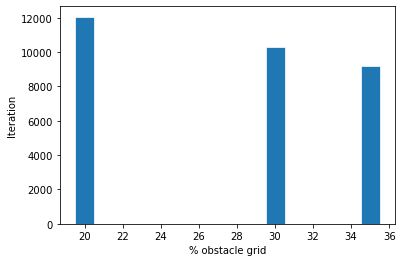

<Figure size 432x288 with 0 Axes>

In [33]:

dist1, _, _ = bfs(grid20, 2,2,125,125 )
dist2, _,_ = bfs(grid30, 2,2,125,125)
dist3,_,_ = bfs(grid35,2,9,125,125)
y=[dist1,dist2,dist3]
x = [20,30,35]

# fig = plt.fig(8,8)
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel("% obstacle grid")
plt.ylabel("Iteration")
plt.show()
plt.savefig("BFSgraph.png")

[2, 10]
9208
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . End


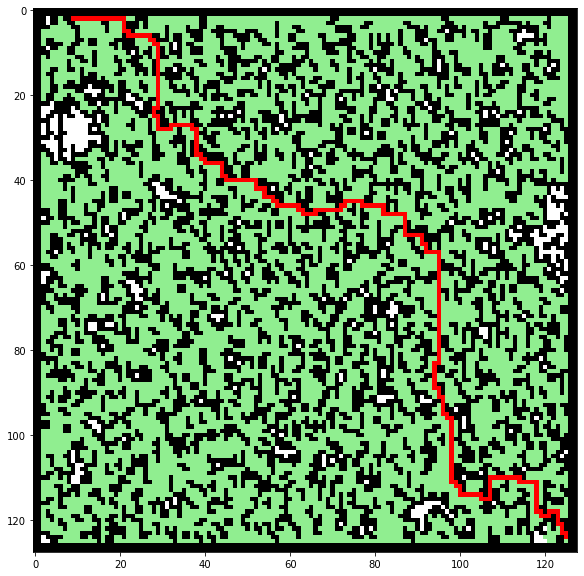

In [24]:
# Run this code to save the animation
save_animation_video(grid35,2,9,125,125)